# Functies
## Rekenen met functies

In [6]:
import sympy as sp
from IPython.display import display

Sympy kan werken met algemene (abstracte) functies. Als je een functie $f$ wilt invoeren, kan je dat op bijna dezelfde manier als het reserveren van symbolen:

In [7]:
x,t = sp.symbols('x t')
f = sp.Function('f')
f(x)

f(x)

**Opdracht 1:** Probeer hierboven eens $f(x)$ te vervangen door $f(5)$ en opnieuw de uitvoer te bekijken.

In [8]:
f(5)

f(5)

Je ziet dat we heel algemene uitvoer krijgen. Bovenstaande functiedefinities zullen we gebruiken als we algemene rekenregels willen ontdekken. Om een functie te maken met een concreet functievoorschrift, kunnen we in Sympy uitdrukkingen gebruiken. Onderstaande regel definieert zo de functie met voorschrift $f(x) = x^2$ op haar grootst mogelijke domein.

In [9]:
f = x**2

f

x**2

Om functies te evalueren kunnen we gebruik maken van het `subs` commando.

In [10]:
f.subs(x,5)

25

Merk op dat bovenstaand commando wel de gevraagde substitutie aanbrengt in $f$ en het resultaat teruggeeft, maar dat de functie $f$ noch de variabele $x$ hierdoor is veranderd.

In [11]:
display(f)
display(x)

x**2

x

Indien je het resultaat verder wilt gebruiken, zul je dit expliciet in een nieuwe variabele moeten opslaan.

**Opdracht 2:** Definieer nu zelf een functie $g$ die $x$ afstuurt op $x\sin(x)$. Wat zijn $g(5)$ en $g(\pi)$?

In [12]:
g = sp.Function('g')
g = x*sp.sin(x)
g

x*sin(x)

In [13]:
display(g.subs(x, 5))
g.subs(x, sp.pi)

5*sin(5)

0

**Opdracht 3:** Gebruik `solveset`, `args` en `subs` om volgend eenvoudig vraagstuk op te lossen met Sympy.

Een Ferrari en een Volkswagen trekken gelijktijdig op vanuit stilstand. De afgelegde weg (in meter) als functie van de tijd (in seconden) wordt voor beide bolides gegeven door respectievelijk $F(t) = 3t^2 + t$ en $V(t) = 2t^2 + 2t$.

Op het moment dat de Ferrari 200 meter heeft afgelegd, hoeveel meter heeft dan de Volkswagen afgelegd?

In [14]:
t = sp.symbols('t')

F = sp.Function('F')
V = sp.Function('V')

F = 3*t**2 + t
V = 2*t**2 + 2*t

In [15]:
ferrari = sp.solveset(sp.Eq(F, 200)).args[1]
volkswagen = V.subs(t, ferrari)
volkswagen

144

## Intermezzo: meer over substituties

Met het substitutiecommando kunnen we nog meer doen dan enkel functiewaarden berekenen. Stel dat we beschikken over volgende uitdrukking waarin twee variabelen, $x$ en $z$, voorkomen.

In [16]:
z = sp.symbols('z')
expr = sp.cos(x)**2 + 5*sp.tan(z)
expr

cos(x)**2 + 5*tan(z)

(Merk op dat we de letter 'z' nog als symbool moesten laten vastleggen in Sympy aangezien we eerder enkel met de variabele $x$ gewerkt hebben.) Stel dat ik in deze uitdrukking overal de cosinus van $x$ wil vervangen door $a$ en dat ik de tangens van $z$ wil vervangen door $b$.

In [17]:
a,b = sp.symbols('a b')
expr = expr.subs([(sp.cos(x),a),(sp.tan(z),b)])

De functie `subs` is zeer krachtig eens je ermee leert werken. De functie moet altijd aangeroepen worden op een uitdrukking. Als argument neemt `subs` één grote lijst aan met koppeltjes waarin staat welke deeluitdrukking waardoor vervangen moet worden. Het moet echter niet zo bescheiden blijven als hierboven. We hadden evengoed volgende berekening kunnen maken

In [18]:
expr.subs([(x, sp.exp(sp.sin(a))),(sp.tan(z), b*sp.tan(b))])

a**2 + 5*b

Als je meer wil leren over de structuur van uitdrukkingen in Sympy kan [volgend artikel](http://docs.sympy.org/latest/tutorial/manipulation.html) van de documentatie je verder helpen.

## Rekenen met functies (2)

**Opdracht 4:** Wat kunnen we verder nog doen met functies? Wel, alle bewerkingen die je zou verwachten van functies zijn aanwezig in Sympy. Voer onderstaande code eens uit en kijk hoe de uitvoer eruit ziet.

In [19]:
display(f + g)
display(f - g)
display(f * g)
display(f / g)
display(f ** g)
display(f.subs(x,g)) #Samenstellen van functies: f(g(x))

x**2 + x*sin(x)

x**2 - x*sin(x)

x**3*sin(x)

x/sin(x)

(x**2)**(x*sin(x))

x**2*sin(x)**2

**Opmerking:** Er bestaat in Sympy nog een tweede manier om met functies te werken. Indien we een functie $f$ willen definiëren, kunnen we dit doen door van de functie $f$ een klasse te maken die de klasse `Function` uitbreidt.

In [20]:
class f(sp.Function):

    @classmethod
    def eval(cls,x):
        return x**2

f(x)

x**2

Deze nieuwe klasse heeft een extra methode `eval()` die ervoor zorgt dat we de functie kunnen evalueren in gegeven punten. Hier hebben we dus een functie $f$ gemaakt die $x$ afstuurt op $x^2$.

Een voordeel van deze aanpak is dat het evalueren van functiewaarden op een heel natuurlijke manier verloopt:

In [21]:
f(5)

25

Hiermee vermijden we het gebruik van de methode `.subs`. Ook het samenstellen van twee functies die gedefinieerd zijn aan de hand van een functieklasse kan zeer eenvoudig. Het nadeel van deze methode is dat we steeds als we een nieuwe functie in het leven willen roepen, bovenstaand blok code (mutatis mutandis) moeten ingeven. Ook het definiëren van bijvoorbeeld de afgeleide functie wordt omslachtiger met de functieklasse.

Omdat wij in deze cursus nooit de extra mogelijkheden van de functieklasse nodig zullen hebben, blijven we in het vervolg werken met uitdrukkingen. Geïnteresseerden kunnen in de documentatie van Sympy uitzoeken welke extra mogelijkheden deze definitie oplevert.

## Stuksgewijs gedefinieerde functies

We kunnen ook functies stuksgewijs definiëren. Het grote hulpstuk hiervoor is de functie `Piecewise`.

In [23]:
x=sp.symbols('x', real=True)

hlinks = x**2
hrechts = x + 2

h = sp.Piecewise((hlinks, x <= 1), (hrechts, True))

h

Piecewise((x**2, x <= 1), (x + 2, True))

Hoe werkt deze constructie? Eerst geven we de voorschriften voor beide takken van de functie in de variabelen `hlinks` en `hrechts`. Vervolgens doet `Piecewise` al het werk voor ons. We geven mee welke voorschriften we gebruiken en wanneer we elk voorschrift gebruiken. Zo gebruiken we voorschrift `hlinks` als voldaan is aan de voorwaarde `x<=1`. Alle voorwaarden worden doorlopen van links naar rechts tot een match gevonden wordt zodat we bij de laatste voorwaarde gewoon `True` kunnen zetten. Zo zijn we zeker dat we aan iedere $x$-waarde een functiewaarde gekoppeld hebben.

**Opdracht 5:** Wat is h$(-2)$? En wat is $h(5)$?

In [24]:
h.subs(x, -2)

4

In [25]:
h.subs(x, 5)

7

**Opdracht 6:** Implementeer de functie $h_2$ die de waarde $0$ aanneemt voor alle $x\leq 0$, de waarde $1$ voor alle $x$ met $0 \lt x \leq 1$ en de waarde 5 op alle andere plaatsen. Wat geeft Sympy terug voor $h(x)$? Let op: de functie `Piecewise` neemt geen meervoudige ongelijkheden aan. Je kan dus niet direct $0 \lt x \leq 1$. Hoe los je dit probleem op als je weet uit het vorige voorbeeld dat alle voorwaarden van links naar rechts worden doorlopen?

In [26]:
# h2 = sp.Function('h2')
h2 = sp.Piecewise((0, x<=0), ((1, sp.And(0 < x, x<1))), (5, True))
h2 = sp.Piecewise((0, x<=0), (1, (0 < x) & (x <= 1)), (5, True))
h2

Piecewise((0, x <= 0), (1, x <= 1), (5, True))

## Grafieken van functies tekenen

Het tekenen van grafieken van functies is heel eenvoudig. Je hebt enkel de functie (of uitdrukking) nodig, de variabele en het bereik van de tekening. Als we bijvoorbeeld de grafiek van de sinusfunctie willen tekenen, waarbij het domein het interval $[-\pi,\pi]$ beslaat, dan gebruiken we de code

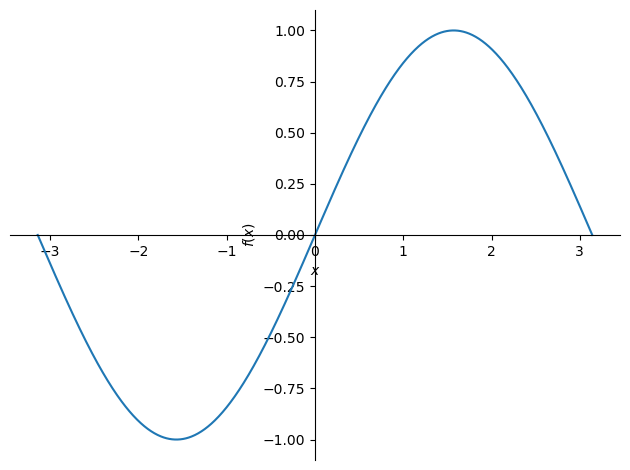

In [27]:
sp.plot(sp.sin(x),(x,-sp.pi,sp.pi))

Eens je het commando uitvoert, verschijnt er een extra venster dat de grafiek bevat. Als je liever hebt dat de grafiek in het werkblad verschijnt, kan je de regel `%matplotlib inline` toevoegen aan het begin van je werkblad (of voor de relevante plots).

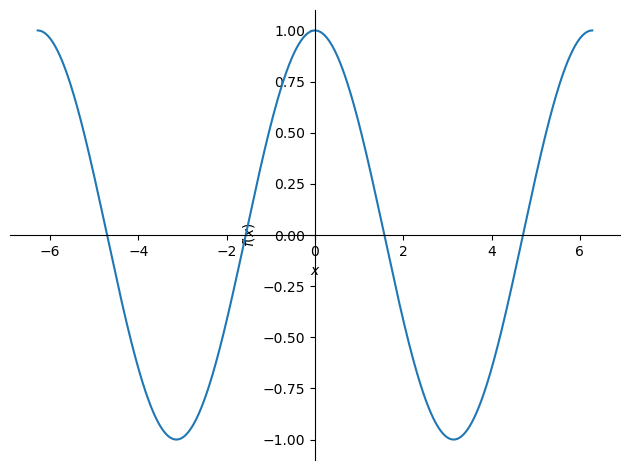

In [28]:
sp.plot(sp.cos(x),(x,-2*sp.pi,2*sp.pi))

**Opdracht 7:** Ook stuksgewijze functies kunnen geplot worden. Let er wel op dat je voor iedere waarde in het domein een functiewaarde toekent. Probeer hieronder eens de functie $h$ van hierboven te tekenen op het interval $[-5, 7]$.

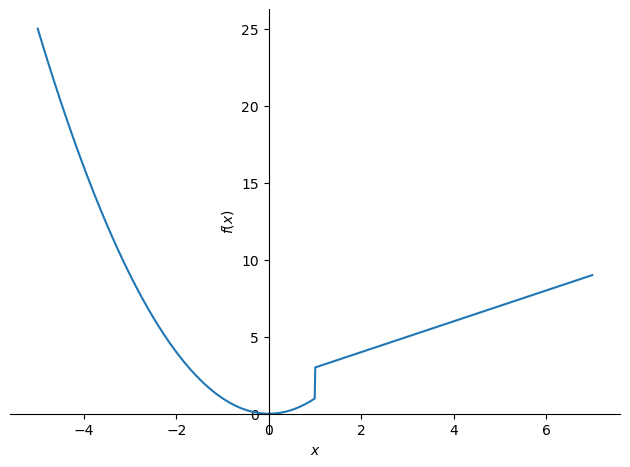

In [29]:
%matplotlib inline
sp.plot(h, (x, -5, 7))

Let wel op met het gebruiken van `%matplotlib inline`. Eens deze regel is ingevoerd, kan je niet meer terug naar de aparte vensters voor plots. Dit kan nochtans handig zijn omdat je via deze vensters makkelijk je plots kan opslaan als png, eps, pdf, ... Als je dit wilt ongedaan maken, zal je je werkblad moeten heropstarten en de regel code verwijderen.

Meerdere grafieken op één tekening kan perfect. Geef gewoon alle relevante functies of uitdrukkingen mee aan `plot()`

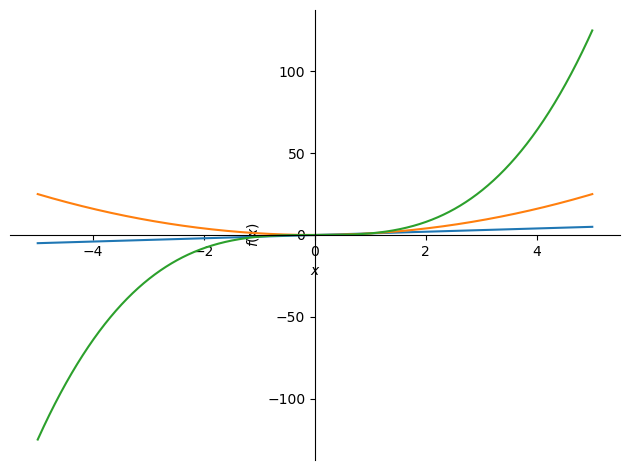

In [30]:
%matplotlib inline
sp.plot(x, x**2, x**3, (x, -5, 5))

Het is zelfs mogelijk om iedere grafiek een ander domein mee te geven

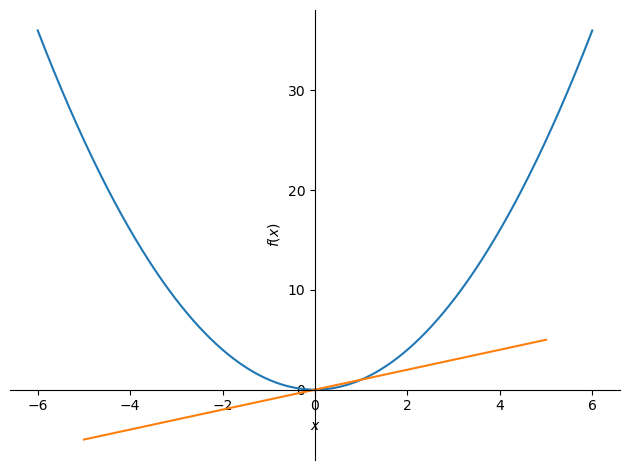

In [39]:
sp.plot((x**2, (x, -6, 6)), (x, (x, -5, 5)))

Stel nu tot slot dat we iedere grafiek op zijn eigen manier willen aanpassen aan onze wensen. Dat kan op volgende manier. We willen op bovenstaande tekening de parabool in het rood tekenen en de rechte in het groen. Hiervoor maken we twee afzonderlijke plots aan, voegen we deze samen en tonen we dan pas het resultaat. De code ziet er als volgt uit:

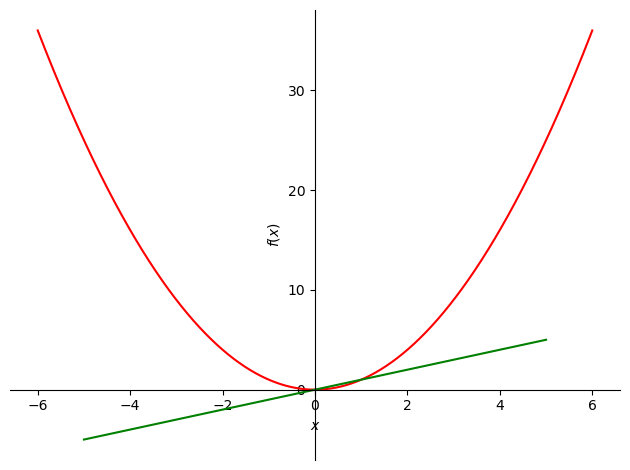

In [40]:
p1 = sp.plot(x**2, (x,-6,6), line_color = 'r', show=False) #De parabool
p2 = sp.plot(x, (x,-5,5), line_color = 'g', show=False) #De rechte
p1.extend(p2) #Voeg de twee plots samen

p1.show()#Toon het resultaat

Het extra argument `show=False` zegt tegen Sympy dat hij nog even moet wachten met alles te tonen tot wij daar expliciet toestemming voor moeten geven. Door op bovenstaande manier te werken, kan je op een overzichtelijke manier per grafiek alles doen wat je wilt en dan alles samenvoegen.

**Opdracht 8:** Op de [documentatie](http://docs.sympy.org/latest/modules/plotting.html) van Sympy over plotten, kan je zien dat je verschillende opties kan meegeven aan je plots zoals je hierboven met `line_color` hebt gedaan. Zoek eens op wat de opties `title`, `xlabel` en `ylabel` precies doen en maak dan een plot van een functie waarin je alledrie gebruikt.

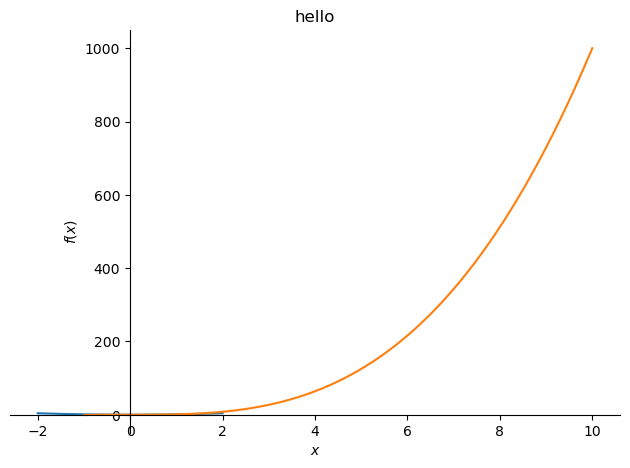

In [41]:
p3 = sp.plot((x**2, (x, -2, 2)), (x**3, (x, -1, 10)), title = 'hello')

Het voordeel van deze extra opties is dat je ermee kan spelen als je de optie `%matplotlib inline` niet inschakelt. Zo kan je overzichtelijke plots maken en deze in verscheidene formaten opslaan. Als je dollartekens in je titel of labels gebruikt, kan je zelfs LaTeX-code in de titel of de assen verwerken.

## Parameterkrommen en impliciet gedefinieerde functies

Sympy kan ook parameterkrommen tekenen. Op de documentatiepagina over [plotten](http://docs.sympy.org/latest/modules/plotting.html) kun je verder zien dat naast een gewoon `plot` commando om grafieken van functies te tekenen, er ook andere plotmogelijkheden zijn. In deze worksheet focussen we ons nog op `plot_parametric` en `plot_implicit`.

Om een geparametriseerde kromme te plotten maken we gebruik van het commando `plot_parametric`. Zoek eens in de documentatie waar de uitleg en enkele voorbeelden rond dit commando staan. Om de kromme met parametrisatie $x(t) = \cos t, \, \, y(t) = \sin t$ te plotten, kunnen we volgende code gebruiken:

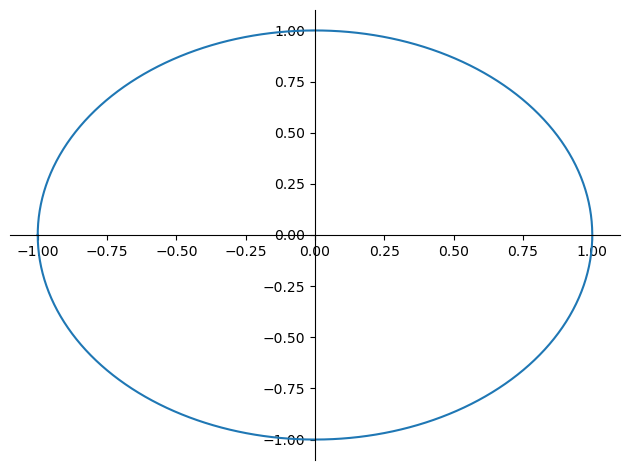

In [42]:
t = sp.symbols('t')
sp.plotting.plot_parametric(sp.cos(t), sp.sin(t), (t,-sp.pi,sp.pi))

Omdat `plot_parametric` een commando is binnen de *plotting* module van Sympy, kunnen we hier niet zomaar het prefix `sp.` plaatsen, maar moeten we uitgebreider `sp.plotting.` aan het commando laten voorafgaan. In het algemeen zul je steeds als je een 'moeilijkere' plot maakt met Sympy, waarvoor de plotting module nodig is, het prefix `sp.plotting.` moeten gebruiken.

Merk ook op dat we tot dusver enkel de variabele *x* gebruikt hadden in de functies. Omdat we nu met de variabele *t* wensten te werken, moesten we eerst de letter *t* nog als symbool definiëren binnen Sympy.

Ten slotte valt op dat we hier een ellips te zien krijgen, waar we een cirkel verwachten. Dit komt omdat de $x$-as en de $y$-as niet dezelfde schaal hebben. Er bestaan commando's om dit te bewerkstelligen voor gewone plots, maar deze werken niet goed samen met `plot_parametric`. In een later werkblad zullen we onderzoeken hoe we meer controle over onze grafieken krijgen.

**Opdracht 9:** Maak een plot van het **Folium van Descartes**: $x(t) = \frac{3t}{1+t^3}, \, \, y(t) = \frac{3t^2}{1+t^3}$. Zorg ervoor dat de $x$-as en de $y$-as beiden slechts van -2 tot 2 getoond worden. Hoe je dit laatste kunt bewerkstellingen, kun je opzoeken op de documentatiepagina over plotting.

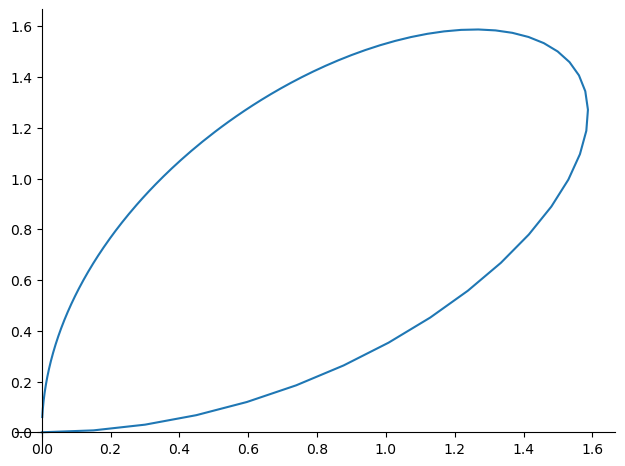

In [43]:
sp.plotting.plot_parametric((3*t/(1+t**3)), (3*t**2/(1+t**3)), (t, 0, 50))

Via het commando `plot_implicit` kun je oplossingen van vergelijkingen in twee variabelen plotten, zoals alle $(x,y) \in \mathbb{R}^2$ die voldoen aan $x^2+y^2=1$.

**Opdracht 10:** Bekijk de voorbeelden in de documentatie van Sympy die bij `plot_implicit` horen. Als je deze doorgrond hebt, probeer dan de *cusp* te plotten: alle oplossingen van de vergelijking $y^2 = x^3$. Let op: we hebben eerder in dit werkblad nog nergens *y* als variabele gebruikt.

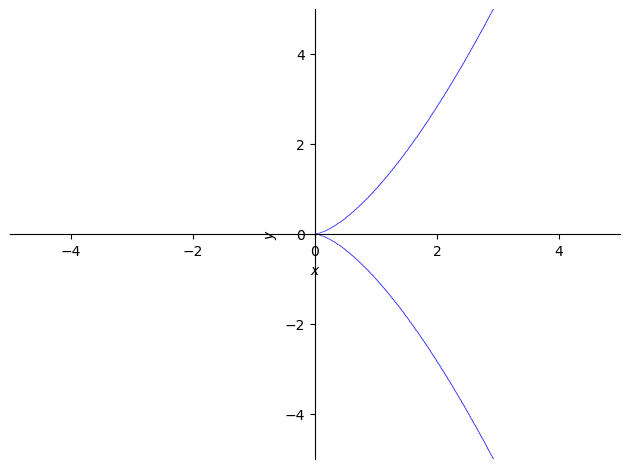

In [46]:
y = sp.symbols('y')
sp.plotting.plot_implicit(sp.Eq(y**2, x**3))